## 통계 검정
- 첫번째 확인 : 가설 설정
- 두번째 확인 : 검정을 하기 전 필요한 가정(Assumption)이 뭔지 파악하고 가정 확인
- 세번째 확인 : 통계 검정

## 독립표본 T-검정
- Assumption
  - 정규성 검정 by shapiro
  - 등분산성 검정 by levene

### 데이터 불러오기


In [1]:
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/ethanweed/pythonbook/main/Data/harpo.csv")
df.head()

,grade,tutor
0,65,Anastasia
1,72,Bernadette
2,66,Bernadette
3,74,Anastasia
4,73,Anastasia


### 데이터 요약
- 각 클래스 학생들의 데이터 분포 요약
- groupby : 평균, 표준편차, 몇 명

In [9]:
df.groupby('tutor').describe().reset_index()

tutor grade                                                    
              count       mean       std   min    25%   50%   75%   max
0   Anastasia  15.0  74.533333  8.998942  55.0  69.00  76.0  79.0  90.0
1  Bernadette  18.0  69.055556  5.774918  56.0  66.25  69.0  73.0  79.0

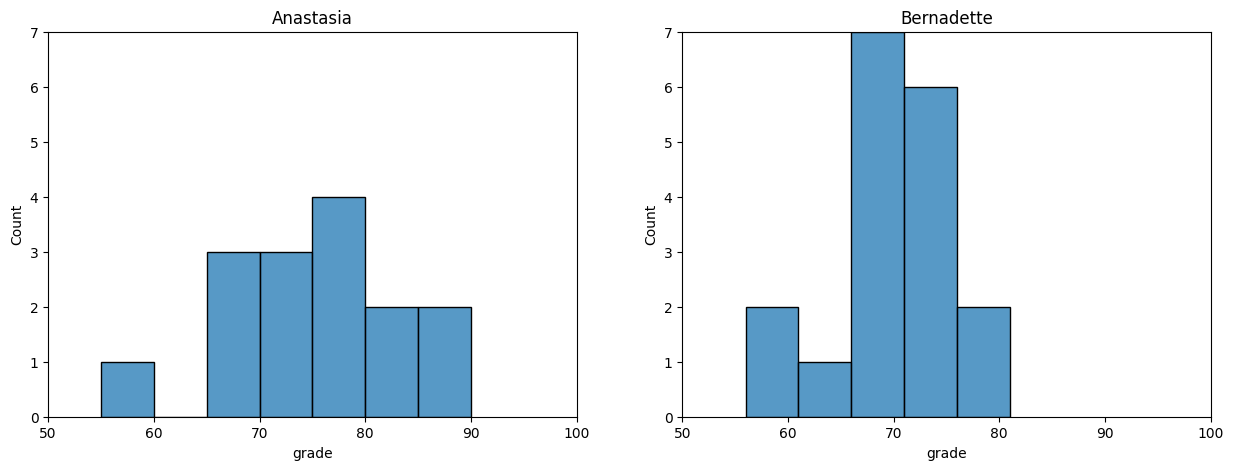

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(15,5))

Anastasia = pd.DataFrame(df.loc[df['tutor'] == 'Anastasia']['grade']).reset_index(drop=True)
Bernadette = pd.DataFrame(df.loc[df['tutor'] == 'Bernadette']['grade']).reset_index(drop=True)
sns.histplot(Anastasia['grade'], ax = axes[0], binwidth=5)
sns.histplot(Bernadette['grade'], ax = axes[1], binwidth=5)

axes[0].set_xlim(50,100)
axes[1].set_xlim(50,100)

axes[0].set_ylim(0,7)
axes[1].set_ylim(0,7)

axes[0].set_title('Anastasia')
axes[1].set_title('Bernadette')

plt.show()

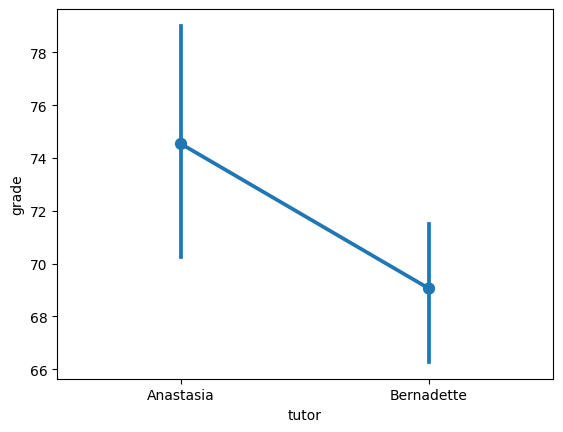

In [14]:
sns.pointplot(x = 'tutor', y = 'grade', data = df)
plt.show()

In [ ]:
!pip install --upgrade pingouin

### 정규성 검정

In [21]:
import pingouin as pg
pg.normality(df, dv='grade', group='tutor')

,W,pval,normal
tutor,,,
Anastasia,0.981857,0.980597,True
Bernadette,0.969075,0.780127,True


### 등분산성 검정

In [22]:
pg.homoscedasticity(data = df, dv = 'grade', group='tutor')

,W,pval,equal_var
levene,2.128701,0.154622,True


### ttest

In [25]:
from pingouin import ttest
ttest(Anastasia['grade'], Bernadette['grade'], correction=False) # correction은 독립표본 T-검정하겠다.

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,2.115432,31,two-sided,0.042529,"[0.2, 10.76]",0.739561,1.755,0.53577


## 독립표본 T-검정 과제
- 주어진 데이터(toothgrowth.csv)에는 기니피그 60마리의 치아 길이, 투여한 비타민 C 종류, 투여량이 저장되어 있다.  오렌지주스를 투여받은 기니피그의 치아 길이 평균이 아스코르브산을 투여받은 기니피그의 치아 길이 평균과 일치하는지 t-검정(Two Sample t-test)를 통해 답하고자 한다.
- 각 그룹의 표본평균
- 귀무가설, 대립가설 설정
- 정규성 검정, 등분산성 검정 작성하고 결과 해석
- t-test 진행하고, t-통계량, p-value 도출
- 가설검정 결과를 귀무가설 기준으로 채택/가격 여부를 판단

조건 : pingouin 라이브러리 사용 x, scipy라이브러리만 사용

In [26]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

# CSV 파일 경로
csv_file_path = '/content/drive/MyDrive/toothgrowth.csv'

# CSV 파일을 Pandas DataFrame으로 불러오기
df = pd.read_csv(csv_file_path)

# DataFrame 출력
print(df)

In [106]:
# 각 투입 종류 별로 치아길이의 평균 도출
df.groupby(['supp'])['len'].agg(['mean', 'std', 'count']).reset_index()

,supp,mean,std,count
0,OJ,20.663333,6.605561,30
1,VC,16.963333,8.266029,30


- 귀무가설 : 오렌지주스를 투여받은 기니피그의 치아 길이 평균과 아스코르브산을 투여받은 기니피그의 치아 길이 평균은 서로 같다.
- 대립가설 : 오렌지주스를 투여받은 기니피그의 치아 길이 평균과 아스코르브산을 투여받은 기니피그의 치아 길이 평균은 서로 다르다.

In [116]:
# 정규성 검정
from scipy.stats import shapiro

# 각 그룹의 데이터 지정
data_VC = df.loc[df['supp'] == 'VC', 'len']
data_OJ = df.loc[df['supp'] == 'OJ', 'len']

print(scipy.stats.shapiro(data_OJ))
print(scipy.stats.shapiro(data_VC))
  # OJ는 pvalue값이 0.05 미만이므로 정규성을 만족하지 않는다.
  # VC는 pvalue값이 0.05 이상이므로 정규성을 만족한다.
  # 그러나 각 그룹의 n이 30이상이므로 중심극한정리에 의해 정규성을 만족한다고 하고 다음으로 넘어가본다.

ShapiroResult(statistic=0.917843222618103, pvalue=0.023587485775351524)
ShapiroResult(statistic=0.9656713008880615, pvalue=0.4284436106681824)


In [117]:
# 등분산성 검정
from scipy.stats import levene
scipy.stats.levene(data_VC, data_OJ)
  # pvalue값이 0.05 이상이므로 등분산성 만족

LeveneResult(statistic=1.2135720656945064, pvalue=0.2751764616144053)

In [114]:
# ttest
from scipy.stats import ttest_ind
scipy.stats.ttest_ind(data_OJ, data_VC, equal_var=True)
  # t통계량은 1,92
  # p value는 0.60
  # pvalue값이 0.05 이상이므로 귀무가설을 채택
  # 각 그룹간의 평균차이는 없다. -> 각 그룹간의 평균차이가 통계적으로 유의할만큼 차이나지 않는다.

Ttest_indResult(statistic=1.91526826869527, pvalue=0.06039337122412849)

## 대응표본 T-검정
- 동일 그룹의 실험결과를 쌍으로 묶은 다음 각 결과간의 관측값의 차를 이용한 두 모평균의 차이에 관한 추론으로 쌍체비교라고도 한다.
- 각 쌍의 차이를 D로 두고 이를 확률표본으로 한다.
- Assumption
  - 정규성 검정(두 변수의 차이(D)가 정규분포를 따르는지 확인) by shapiro
- 같은 그룹이므로 분산은 등분산이고, 검정 필요 x

### 데이터 불러오기
- 체중 측정
- 식단, 운동 프로그램 진행


In [118]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/ethanweed/pythonbook/main/Data/chico.csv")
df.head()

,id,grade_test1,grade_test2
0,student1,42.9,44.6
1,student2,51.8,54.0
2,student3,71.7,72.3
3,student4,51.6,53.4
4,student5,63.5,63.8


In [119]:
df.describe()

,grade_test1,grade_test2
count,20.000000,20.000000
mean,56.980000,58.385000
std,6.616137,6.405612
min,42.900000,44.600000
25%,51.750000,53.100000
50%,57.700000,59.700000
75%,62.050000,63.050000
max,71.700000,72.300000


### 데이터 시각화

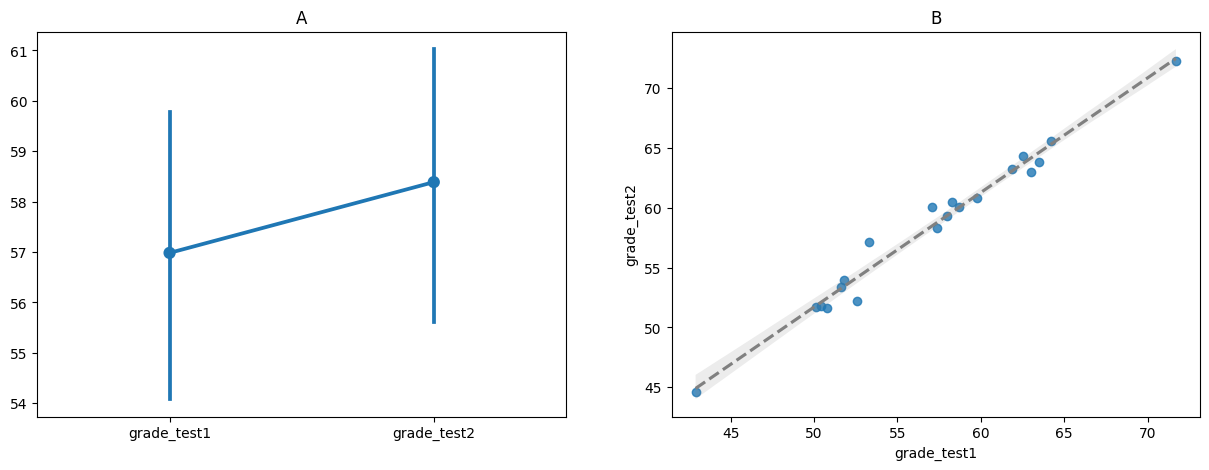

In [132]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(1, 2, figsize=(15,5))

sns.pointplot(data = df, ax = ax[0])
sns.regplot(data = df, x = 'grade_test1', y = 'grade_test2', ax = ax[1], line_kws = {'linestyle':'--', 'color':'gray'})

ax[0].set_title('A')
ax[1].set_title('B')
plt.show()

### 데이터 가공
- 실험 전후 차이를 보기 위해

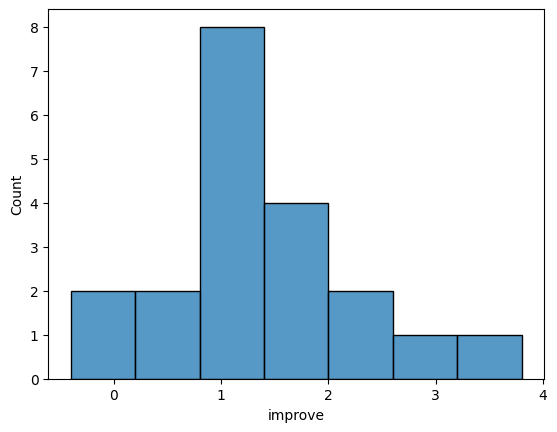

In [134]:
df2 = df.copy()
df2['improve'] = df2['grade_test2'] - df2['grade_test1']

sns.histplot(data = df2, x = 'improve')
plt.show()

### 정규성 검정

In [140]:
import pingouin as pg
pg.normality(df2['improve'])

,W,pval,normal
improve,0.966399,0.677769,True


### T검정

In [141]:
from pingouin import ttest
ttest(df2['grade_test2'], df2['grade_test1'], paired=True) # paired를 True로 두면 대응표본 검정을 하겠다.

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,6.475436,19,two-sided,0.000003,"[0.95, 1.86]",0.215765,5991.577,0.150446


## 대응표본 T_검정 과제
- 주어진 데이터(data/insectsprays.csv)에는 여러 지역에서 스프레이를 뿌리기 전에 측정한 곤충의 수와 스프레이를 뿌린 다음의 곤충의 수가 저장되어 있다. 해당 스프레이가 구제 효과가 있는지(즉, 스프레이를 뿌린 뒤 곤충의 수가 감소했는지) 대응(쌍체)표본 t-검정(Paired t-test)을 통해 답하고자 한다.
- 문제 1. before_spr과 after_spr의 차이를 확인하여 diff 변수 로 저장한다.
- 문제 2. 가설을 설정한다. (귀무가설 & 대립가설)
- 문제 3. 정규성을 확인한다.
- 문제 4. 정규성을 만족하면 ttest 진행 후, t_score, p_value값을 구한다.
- 문제 5. 귀무가설 채택/기각 여부를 확인한다.
- 문제 6. pointplot() 그래프를 작성하여 시각화로 차이 여부를 추가로 확인한다.
조건 : scipy 모듈로 진행

In [161]:
# 데이터 가져오기
import pandas as pd

# CSV 파일 경로
csv_file_path = '/content/drive/MyDrive/insectsprays.csv'

# CSV 파일을 Pandas DataFrame으로 불러오기
df = pd.read_csv(csv_file_path)

# DataFrame 출력
df.head()

,before_spr,after_spr
0,10,0
1,7,1
2,20,7
3,14,2
4,14,3


In [164]:
diff = df['after_spr'] - df['before_spr']
diff.head()

0   -10
1    -6
2   -13
3   -12
4   -11
dtype: int64

- 귀무 가설 : 스프레이를 뿌리기 전후 차이의 평균은 0이다.
- 대립 가설 : 스프레이를 뿌리기 전후 차이의 평균은 0이 아니다.

In [165]:
diff.describe()
  # n이 30이상이므로 정규성 만족하여 검정 생략

count    36.000000
mean    -12.000000
std       4.834401
min     -24.000000
25%     -13.250000
50%     -12.000000
75%      -9.000000
max      -4.000000
dtype: float64

In [167]:
# ttest
from scipy.stats import ttest_rel
t_score, p_value = scipy.stats.ttest_rel(df['after_spr'], df['before_spr'])
print(t_score)
print(p_value)
  # pvalue값이 0.05보다 현저히 작으므로 귀무가설을 기각한다.

-14.893263274163433
1.0227956957398466e-16


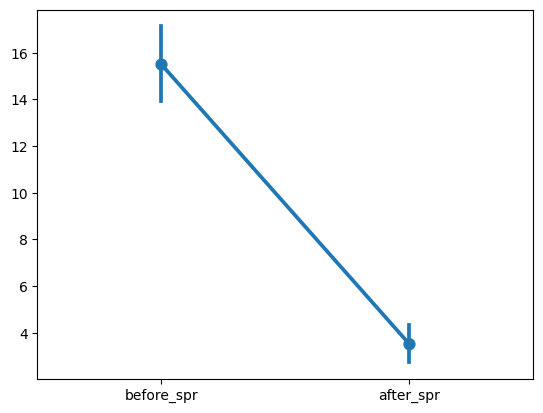

In [159]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pointplot(data = df)
plt.show()